BIO1 & BIO2 VISUALIZATION

Bio1 = Annual Mean Temperature
Bio2 = Mean Diurnal Range (Mean of monthly max-min temp)

Bio1 shape: (23, 69)
Bio2 shape: (23, 69)
Coordinates: lat(23), long(69)

1. Visualizing Reference Period (side-by-side)...


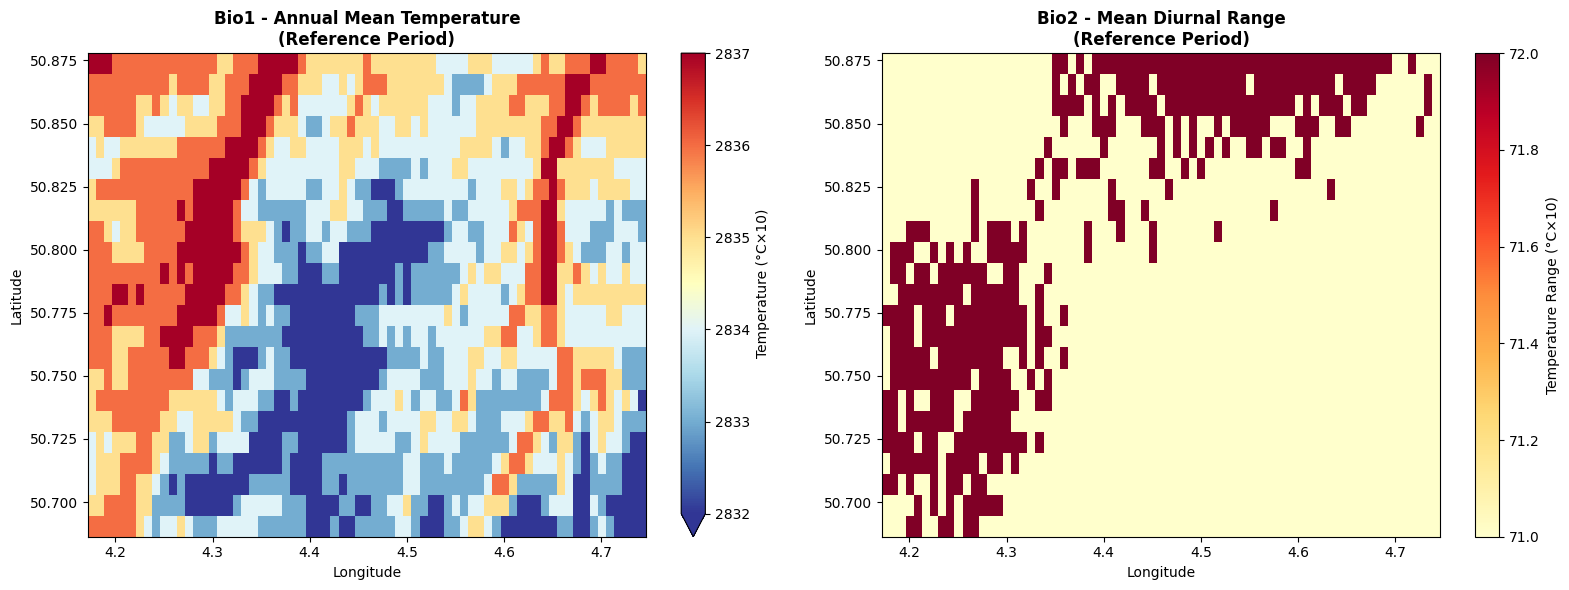


2. Visualizing Future Scenarios...


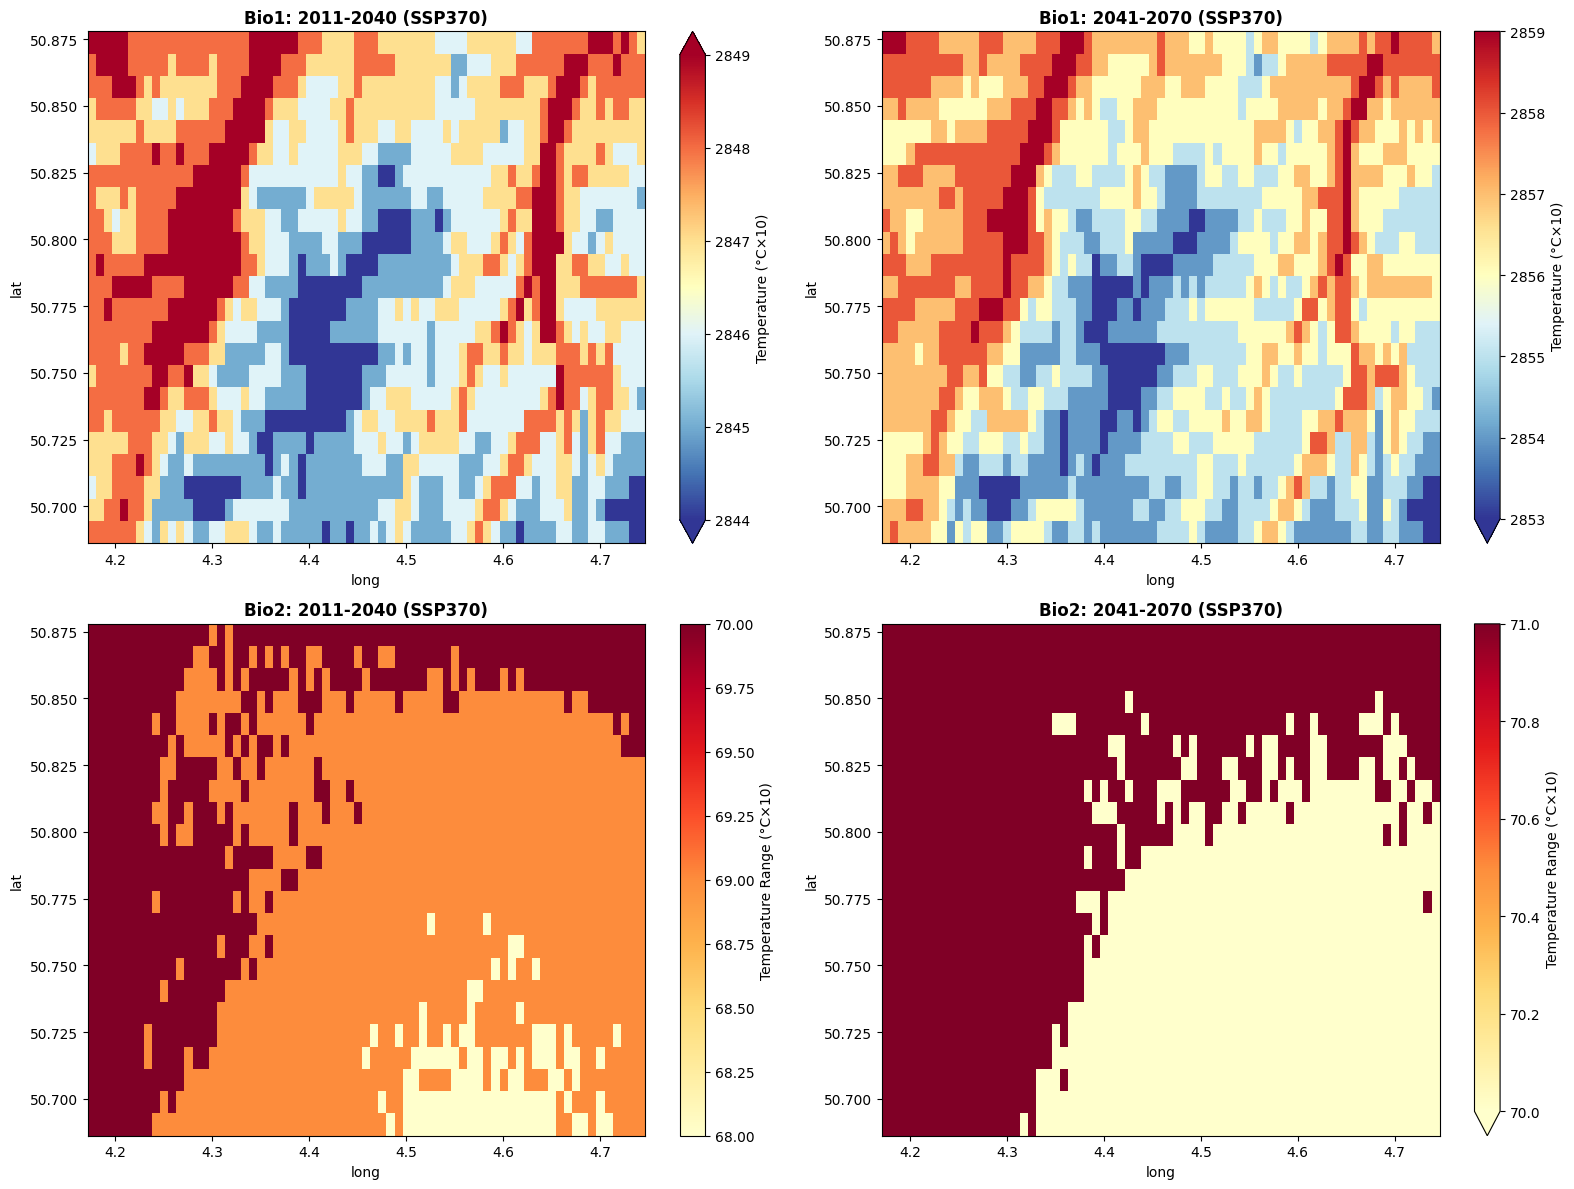


3. Calculating changes from reference period...


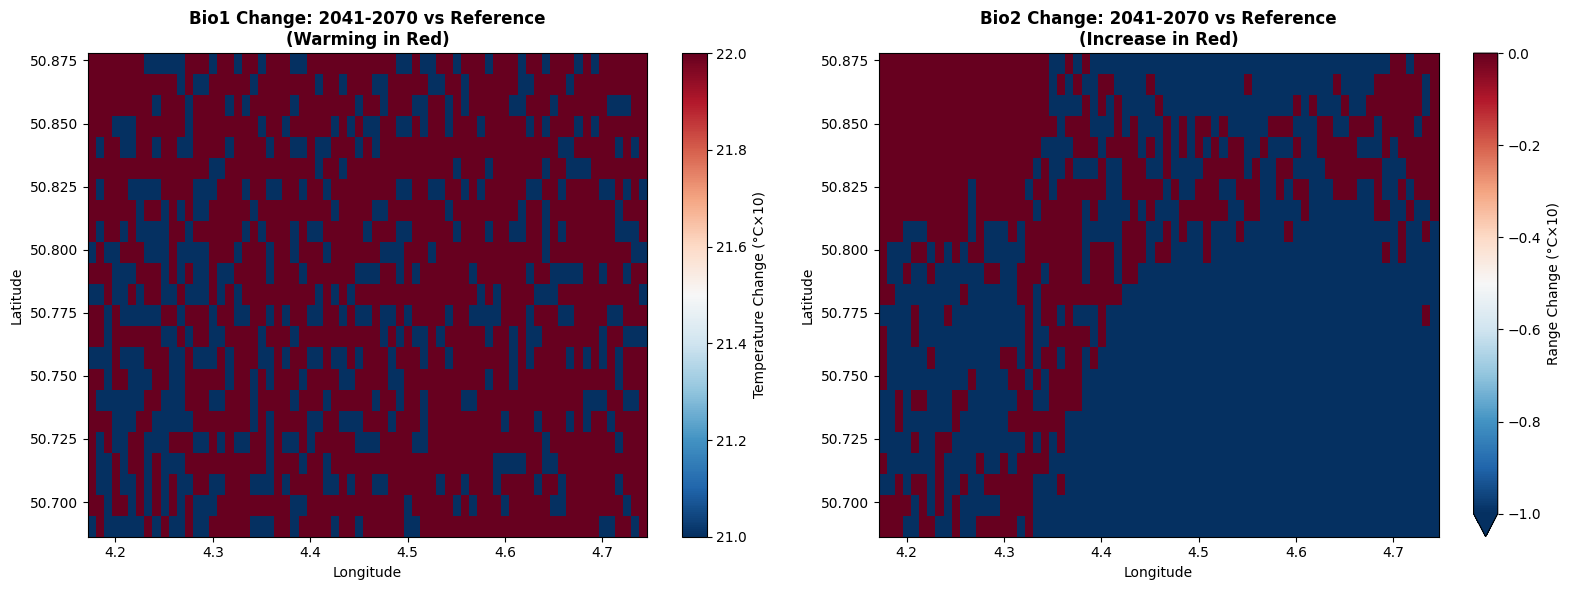


STATISTICS

Reference Period:
  Bio1 mean: 2834.3 (°C×10)
  Bio1 range: 2831.0 to 2837.0
  Bio2 mean: 71.2 (°C×10)
  Bio2 range: 71.0 to 72.0

Future (2041-2070, SSP370):
  Bio1 mean: 2856.0 (°C×10)
  Bio1 change: +21.7 (°C×10)
  Bio2 mean: 70.6 (°C×10)
  Bio2 change: -0.7 (°C×10)


Note: Values are in °C×10 (divide by 10 for actual °C)
Example: 100 = 10.0°C


In [5]:

from datatree import open_datatree
import matplotlib.pyplot as plt
import numpy as np

# Read the NetCDF file as DataTree
file_path = 'prototype_test.nc'  # Replace with your file path

print("="*60)
print("BIO1 & BIO2 VISUALIZATION")
print("="*60)
print("\nBio1 = Annual Mean Temperature")
print("Bio2 = Mean Diurnal Range (Mean of monthly max-min temp)")
print("="*60)

# Open the DataTree
dt = open_datatree(file_path)

# Get bio1 and bio2 from reference period
bio1_ref = dt['static/chelsa_clim_ref_period'].ds['bio1']
bio2_ref = dt['static/chelsa_clim_ref_period'].ds['bio2']

print(f"\nBio1 shape: {bio1_ref.shape}")
print(f"Bio2 shape: {bio2_ref.shape}")
print(f"Coordinates: lat({len(bio1_ref.lat)}), long({len(bio1_ref.long)})")

# ============================================
# 1. SIDE-BY-SIDE COMPARISON
# ============================================
print("\n1. Visualizing Reference Period (side-by-side)...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bio1
bio1_ref.plot(ax=axes[0], cmap='RdYlBu_r', robust=True,
              cbar_kwargs={'label': 'Temperature (°C×10)'})
axes[0].set_title('Bio1 - Annual Mean Temperature\n(Reference Period)',
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Bio2
bio2_ref.plot(ax=axes[1], cmap='YlOrRd', robust=True,
              cbar_kwargs={'label': 'Temperature Range (°C×10)'})
axes[1].set_title('Bio2 - Mean Diurnal Range\n(Reference Period)',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# ============================================
# 2. FUTURE SCENARIOS
# ============================================
print("\n2. Visualizing Future Scenarios...")

bio1_sim = dt['static/chelsa_clim_sim_period'].ds['bio1']
bio2_sim = dt['static/chelsa_clim_sim_period'].ds['bio2']

# Create 2x2 plot: Bio1 and Bio2 for two time periods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Select scenarios
bio1_2040 = bio1_sim.sel(year_range='2011-2040',
                          model_name='gfdl-esm4',
                          ensemble_member='ssp370')
bio1_2070 = bio1_sim.sel(year_range='2041-2070',
                          model_name='gfdl-esm4',
                          ensemble_member='ssp370')
bio2_2040 = bio2_sim.sel(year_range='2011-2040',
                          model_name='gfdl-esm4',
                          ensemble_member='ssp370')
bio2_2070 = bio2_sim.sel(year_range='2041-2070',
                          model_name='gfdl-esm4',
                          ensemble_member='ssp370')

# Plot Bio1 - 2011-2040
bio1_2040.plot(ax=axes[0, 0], cmap='RdYlBu_r', robust=True,
               cbar_kwargs={'label': 'Temperature (°C×10)'})
axes[0, 0].set_title('Bio1: 2011-2040 (SSP370)', fontweight='bold')

# Plot Bio1 - 2041-2070
bio1_2070.plot(ax=axes[0, 1], cmap='RdYlBu_r', robust=True,
               cbar_kwargs={'label': 'Temperature (°C×10)'})
axes[0, 1].set_title('Bio1: 2041-2070 (SSP370)', fontweight='bold')

# Plot Bio2 - 2011-2040
bio2_2040.plot(ax=axes[1, 0], cmap='YlOrRd', robust=True,
               cbar_kwargs={'label': 'Temperature Range (°C×10)'})
axes[1, 0].set_title('Bio2: 2011-2040 (SSP370)', fontweight='bold')

# Plot Bio2 - 2041-2070
bio2_2070.plot(ax=axes[1, 1], cmap='YlOrRd', robust=True,
               cbar_kwargs={'label': 'Temperature Range (°C×10)'})
axes[1, 1].set_title('Bio2: 2041-2070 (SSP370)', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================
# 3. CHANGE DETECTION
# ============================================
print("\n3. Calculating changes from reference period...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate differences (future - reference)
bio1_change = bio1_2070.astype(float) - bio1_ref.astype(float)
bio2_change = bio2_2070.astype(float) - bio2_ref.astype(float)

# Plot Bio1 change
bio1_change.plot(ax=axes[0], cmap='RdBu_r', robust=True,
                 cbar_kwargs={'label': 'Temperature Change (°C×10)'})
axes[0].set_title('Bio1 Change: 2041-2070 vs Reference\n(Warming in Red)',
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Plot Bio2 change
bio2_change.plot(ax=axes[1], cmap='RdBu_r', robust=True,
                 cbar_kwargs={'label': 'Range Change (°C×10)'})
axes[1].set_title('Bio2 Change: 2041-2070 vs Reference\n(Increase in Red)',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# ============================================
# 4. STATISTICS
# ============================================
print("\n" + "="*60)
print("STATISTICS")
print("="*60)

print("\nReference Period:")
print(f"  Bio1 mean: {float(bio1_ref.mean()):.1f} (°C×10)")
print(f"  Bio1 range: {float(bio1_ref.min()):.1f} to {float(bio1_ref.max()):.1f}")
print(f"  Bio2 mean: {float(bio2_ref.mean()):.1f} (°C×10)")
print(f"  Bio2 range: {float(bio2_ref.min()):.1f} to {float(bio2_ref.max()):.1f}")

print("\nFuture (2041-2070, SSP370):")
print(f"  Bio1 mean: {float(bio1_2070.mean()):.1f} (°C×10)")
print(f"  Bio1 change: +{float(bio1_change.mean()):.1f} (°C×10)")
print(f"  Bio2 mean: {float(bio2_2070.mean()):.1f} (°C×10)")
print(f"  Bio2 change: {float(bio2_change.mean()):+.1f} (°C×10)")

print("\n" + "="*60)
print("\nNote: Values are in °C×10 (divide by 10 for actual °C)")
print("Example: 100 = 10.0°C")
